- Dummy version



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

In [3]:
df_p = pd.read_csv('pumps.csv', index_col = 0)
df_py = pd.read_csv('pumps_y.csv', index_col = 0)

In [4]:
df_p.shape, df_py.shape

((59400, 39), (59400, 1))

In [5]:
#Merging pumps_y as a new column on pumps
df_p['status_group'] = df_py['status_group']

In [6]:
df_p.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
#Missing Values
df_p.isnull().sum() # number of missing values

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

Remove scheme_name and date_recorded because scheme_name is mostly empty and date_recorded is something that cant be correlated

In [8]:
df_p = df_p.drop(['scheme_name', 'date_recorded'], axis=1)

In [9]:
df_p.head(3)

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional


In [10]:
#Split the dataframe into numeric and categorical

In [11]:
#Divide df into numeric and categorical

df_num = df_p[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']]

In [12]:
#Categorical df

df_cat = df_p[['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']]

In [13]:
#Check the NaNs - num
df_num.isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [14]:
#Check the NaNs - cat
df_cat.isnull().sum()

funder                   3635
installer                3655
wpt_name                    0
basin                       0
subvillage                371
region                      0
lga                         0
ward                        0
public_meeting           3334
recorded_by                 0
scheme_management        3877
permit                   3056
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
dtype: int64

In [15]:
#Fill all NaNs with 'no data'
df_cat_fillna = df_cat.fillna('not available')

In [16]:
#Recheck NaNs
df_cat_fillna.isnull().sum()

funder                   0
installer                0
wpt_name                 0
basin                    0
subvillage               0
region                   0
lga                      0
ward                     0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [17]:
#Count the unique categorical variables
uniqueValues = df_cat_fillna.nunique()
print(uniqueValues)

funder                    1898
installer                 2146
wpt_name                 37400
basin                        9
subvillage               19288
region                      21
lga                        125
ward                      2092
public_meeting               3
recorded_by                  1
scheme_management           13
permit                       3
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_group                6
quantity                     5
quantity_group               5
source                      10
source_type                  7
source_class                 3
waterpoint_type              7
waterpoint_type_group        6
status_group                 3
dtype: int64


Based on above, select: (cat var numbers < 10 and not duplicate ie quantity & quantity group)
- basin
- public meeting
- permit
- extraction_type_class
- management_group
- payment
- payment_type (one of them needs to be dropped)
- water_quality
- quality_group (keep this if it is like above)
- quantity
- quantity_group
- source_class
- waterpoint_type_group


train against status_group

In [18]:
df_cat_fillna['payment'].unique()

array(['pay annually', 'never pay', 'pay per bucket', 'unknown',
       'pay when scheme fails', 'other', 'pay monthly'], dtype=object)

In [19]:
df_cat_fillna['payment_type'].unique()

array(['annually', 'never pay', 'per bucket', 'unknown', 'on failure',
       'other', 'monthly'], dtype=object)

In [20]:
df_cat_fillna['water_quality'].unique()

array(['soft', 'salty', 'milky', 'unknown', 'fluoride', 'coloured',
       'salty abandoned', 'fluoride abandoned'], dtype=object)

In [21]:
df_cat_fillna['quality_group'].unique()

array(['good', 'salty', 'milky', 'unknown', 'fluoride', 'colored'],
      dtype=object)

In [22]:
df_cat_fillna['quantity'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

In [23]:
df_cat_fillna['quantity_group'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

Based on above, select: (cat var numbers < 10 and not duplicate ie quantity & quantity group)
- basin
- permit
- extraction_type_class
- management_group
- payment_type 
- quality_group (keep this if it is like above)
- quantity_group
- source_class
- waterpoint_type_group


train against status_group

In [26]:
df_cat_fillna.columns

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [53]:
#Dummify everything
dummy_cat_var = pd.get_dummies(df_cat_fillna[['basin','permit','extraction_type_class', 'management_group',
                                             'payment_type','quality_group', 'quantity_group', 'source_class','waterpoint_type_group',
                                             'status_group']])

In [54]:
#Check the dummy df and NORMALLY remove the redundant variable. I will not here...
dummy_cat_var.head()

,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,permit_False,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
id,,,,,,,,,,,,,,,,,,,,,
69572,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8776,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
34310,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
67743,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
19728,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [55]:
#Concat original cat df and dummified target

df_cat_fillna_dummy = pd.concat([df_cat_fillna, dummy_cat_var], axis = 1)
df_cat_fillna_dummy.head(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0


In [56]:
#Check the shape
df_cat_fillna_dummy.shape

(59400, 83)

In [57]:
#Check the column string to make sure that everything is there
df_cat_fillna_dummy.columns
#['basin','permit', 'extraction_type_class', 'management_group', 
#                                                       'payment_type', 'quality_group', 'quantity_group', 'source_class', 
#                                                       'waterpoint_type_group']

Index(['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'permit_False', 'permit_True', 'permit_not available',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       

In [58]:
df_cat_fillna_dummy.head()

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
67743,Unicef,UNICEF,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,Nanyumbu,Nanyumbu,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,0,0,1
19728,Action In A,Artisan,Shuleni,Lake Victoria,Kyanyamisa,Kagera,Karagwe,Nyakasimbi,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0


In [59]:
#Check heads and tails before merging
df_num.head(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009


In [60]:
df_num.tail(3)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,,,,,,,,,
37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
31282,0.0,0,35.861315,-6.378573,0,1,4,0,0
26348,0.0,191,38.104048,-6.747464,0,5,2,150,2002


In [61]:
df_cat_fillna_dummy.head(3)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,Roman,none,Lake Nyasa,Mnyusi B,Iringa,Ludewa,Mundindi,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
8776,Grumeti,GRUMETI,Zahanati,Lake Victoria,Nyamara,Mara,Serengeti,Natta,not available,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
34310,Lottery Club,World vision,Kwa Mahundi,Pangani,Majengo,Manyara,Simanjiro,Ngorika,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0


In [62]:
df_cat_fillna_dummy.tail(10)

,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
id,,,,,,,,,,,,,,,,,,,,,
13677,Rudep,DWE,Kwa Mzee Atanas,Lake Tanganyika,Kitonto,Rukwa,Sumbawanga Rural,Mkowe,True,GeoData Consultants Ltd,...,0,0,0,0,1,0,0,1,0,0
44885,Government Of Tanzania,Government,Kwa,Pangani,Maore Kati,Kilimanjaro,Same,Maore,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,0,0,1
40607,Government Of Tanzania,Government,Benard Charles,Lake Rukwa,Mbuyuni A,Mbeya,Chunya,Mbuyuni,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,0,0,1
48348,Private,Private,Kwa Peter,Internal,Masanga,Tabora,Igunga,Igunga,False,GeoData Consultants Ltd,...,0,0,0,0,0,0,1,1,0,0
11164,World Bank,ML appro,Chimeredya,Wami / Ruvu,Komstari,Morogoro,Mvomero,Diongoya,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,0,0,1
60739,Germany Republi,CES,Area Three Namba 27,Pangani,Kiduruni,Kilimanjaro,Hai,Masama Magharibi,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
27263,Cefa-njombe,Cefa,Kwa Yahona Kuvala,Rufiji,Igumbilo,Iringa,Njombe,Ikondo,True,GeoData Consultants Ltd,...,0,0,1,0,0,0,0,1,0,0
37057,not available,not available,Mashine,Rufiji,Madungulu,Mbeya,Mbarali,Chimala,True,GeoData Consultants Ltd,...,0,0,0,0,1,0,0,1,0,0
31282,Malec,Musa,Mshoro,Rufiji,Mwinyi,Dodoma,Chamwino,Mvumi Makulu,True,GeoData Consultants Ltd,...,0,0,0,0,1,0,0,1,0,0


In [63]:
#Merge dummified_target_encoded_cat and numeric dataframes
num_dumm_cat = pd.concat([df_num, df_cat_fillna_dummy], axis = 1)

In [64]:
num_dumm_cat.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,funder,...,source_class_unknown,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,status_group_functional,status_group_functional needs repair,status_group_non functional
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999,Roman,...,0,0,1,0,0,0,0,1,0,0
8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010,Grumeti,...,0,0,1,0,0,0,0,1,0,0
34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009,Lottery Club,...,0,0,1,0,0,0,0,1,0,0
67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986,Unicef,...,0,0,1,0,0,0,0,0,0,1
19728,0.0,0,31.130847,-1.825359,0,18,1,0,0,Action In A,...,0,0,1,0,0,0,0,1,0,0


In [40]:
num_dumm_cat['quality_group_fluoride'].head()

id
69572    0
8776     0
34310    0
67743    0
19728    0
Name: quality_group_fluoride, dtype: uint8

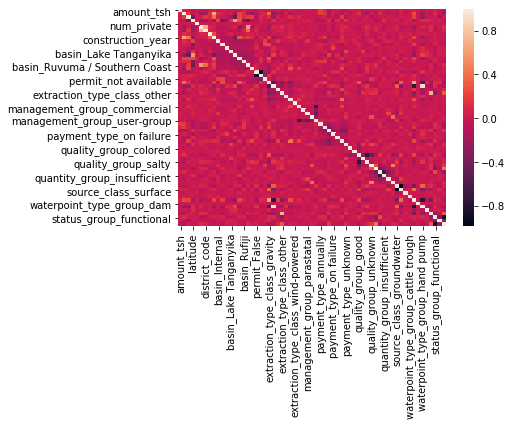

In [65]:
#Corr heatmap
sns.heatmap(num_dumm_cat.corr())

In [66]:
num_dumm_cat.columns

Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year',
       'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
       'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management',
       'permit', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'permit_False', 'permit_True', 'permit_not available',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'ex

In [67]:
#Define data and train sets
X = num_dumm_cat.loc[:,'basin_Internal':'waterpoint_type_group_other']
y_func = num_dumm_cat.loc[:, 'status_group_functional']
y_nonfunc = num_dumm_cat.loc[:, 'status_group_non functional']
y_repair = num_dumm_cat.loc[:, 'status_group_functional needs repair']

In [68]:
#Check shapes
X.shape, y_func.shape

((59400, 51), (59400,))

In [69]:
#Check X and y column names
X.columns

#['basin','permit', 'extraction_type_class', 'management_group', 
#                                                       'payment_type', 'quality_group', 'quantity_group', 'source_class', 
#                                                       'waterpoint_type_group']

Index(['basin_Internal', 'basin_Lake Nyasa', 'basin_Lake Rukwa',
       'basin_Lake Tanganyika', 'basin_Lake Victoria', 'basin_Pangani',
       'basin_Rufiji', 'basin_Ruvuma / Southern Coast', 'basin_Wami / Ruvu',
       'permit_False', 'permit_True', 'permit_not available',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       'extraction_type_class_wind-powered', 'management_group_commercial',
       'management_group_other', 'management_group_parastatal',
       'management_group_unknown', 'management_group_user-group',
       'payment_type_annually', 'payment_type_monthly',
       'payment_type_never pay', 'payment_type_on failure',
       'payment_type_other', 'payment_type_per bucket', 'payment_type_unknown',
       'quality_group_colored', 'quality_group_fluoride', 'quality_group_good',
       'quality_

In [70]:
m_f = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)
m_nf = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)
m_r = LogisticRegression(C=1e5, solver = 'lbfgs') # C is a hyperparameter (regularization, W03)

m_f.fit(X, y_func) # find the best model parameters for this data functional pumps
m_nf.fit(X, y_nonfunc) # best model params for non_functional
m_r.fit(X, y_repair) # best model params for repair needing pumps

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [71]:
print('Score for functional pump prediction is', m_f.score(X,y_func)) # calculates the accuracy (% of correct points) for non_func
print('Score for functional but repair needing pump prediction is', m_r.score(X,y_repair))
print('Score for nonfunctional pump prediction is', m_nf.score(X,y_nonfunc))

Score for functional pump prediction is 0.7245959595959596
Score for functional but repair needing pump prediction is 0.9273063973063973
Score for nonfunctional pump prediction is 0.7812794612794612
